<div class='alert alert-success'>
    <h1>Qiskit Tutorial, Part 6: Quantum Information? </h1>
    <h4>Yen Lee Loh; started 2023-4-5, edited 2023-4-7 </h4>
</div>

<div class="alert alert-info"><h2>  Setup  </h2></div>

This is a Markdown cell with LaTeX definitions.  Please run it.
$\newcommand{\mean}[1]{\langle #1 \rangle}$
$\newcommand{\ket}[1]{\lvert #1 \rangle}$
$\newcommand{\adag}{a^\dagger}$

In [1]:
import numpy as np; from numpy import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import qiskit,qiskit_aer
import qiskit.visualization as qisvis
from qiskit.providers.fake_provider import fake_provider
vigoBackend = fake_provider.FakeVigo()
rng = random.default_rng()

def toBitString(integer, numBits): return bin(integer)[2:].zfill(numBits)
def plotStateVector(psi,ax,cmap=mpl.cm.hsv):
  nmax = int(np.log(len(psi)) / np.log(2)) # number of qubits
  lmax = 2**nmax                           # number of states
  probs = np.abs(psi)**2
  phases = np.remainder(np.angle(psi) / (2*np.pi), 1)
  for l in range(lmax):
    patch = patches.Rectangle([l,0], 1,probs[l], ec='black', fc=cmap(phases[l]))
    ax.add_patch(patch)
  ax.set_xticks([l+.5 for l in range(lmax)])
  ax.set_xticklabels([toBitString(l,nmax) for l in range(lmax)])
  ax.set_xlim(-.5, lmax+.5)
  ax.set_ylim(0, max(probs)*1.1)
def padCounts(cts, numBits):
  def sanitize(count): return (0 if count==None else count)
  n = numBits
  return {toBitString(i,n):sanitize(cts.get(toBitString(i,n))) for i in range(2**n)}
def plotHistogram(counts,ax,fc='#9cf',textrot=0):
  if isinstance (counts, dict):
    nmax = len(list(counts.keys()) [0] )  # ugly
    counts = padCounts(counts,nmax)
    counts = list(counts.values())
  nmax = int(np.log(len(counts)) / np.log(2)) # number of qubits
  lmax = 2**nmax                           # number of states
  ymax = max(counts)
  for l in range(lmax):
    c = counts[l]
    patch = patches.Rectangle([l,0], 1,c, ec='black', fc=fc)
    ax.add_patch(patch)
    if c>0:
      y = (c+.07*ymax if c<0.9*ymax else c-.07*ymax)
      ax.text (l+.5, y, c, va='center',ha='center')
  ax.set_xticks([l+.5 for l in range(lmax)])
  ax.set_xticklabels([toBitString(l,nmax) for l in range(lmax)])  
  ax.tick_params(axis='x', labelrotation=textrot)
  ax.set_xlim(-.5, lmax+.5)
  ax.set_ylim(0, ymax*1.02)

sim = qiskit_aer.AerSimulator()                         # run this line if you want to use ideal simulator

#sim = qiskit_aer.AerSimulator.from_backend(vigoBackend) # uncomment and run if you want to use a noisy simulator based on IBM's Vigo machine

<div class="alert alert-info"><h2>   Typical Qiskit Workflow </h2></div>

In [72]:
#======== Setup circuit
cir = qiskit.QuantumCircuit(1,2)  # make circuit
cir.save_statevector('psi0')      # save statevector
cir.h(0)
cir.save_statevector('psi1')      # save statevector
cir.measure(0,0)                  # measure qubit 0
cir.save_statevector('psi2')      # save statevector
cir.rx(np.radians(60), 0)
cir.save_statevector('psi3')      # save statevector
cir.measure(0,1)                  # measure qubit 0
cir.save_statevector('psi4')      # save statevector
#======== Run
sim = qiskit.Aer.get_backend('aer_simulator_statevector')   # set up simulator
exe = qiskit.transpile(cir,sim)   # compile
job = sim.run(exe)                # run
res = job.result()                # get result
cts = res.get_counts()
stateNames = [key for key in res.data().keys() if 'psi' in key]
stateNames.sort()
stateVectors = [np.asarray(res.data() [stateName]) for stateName in stateNames]

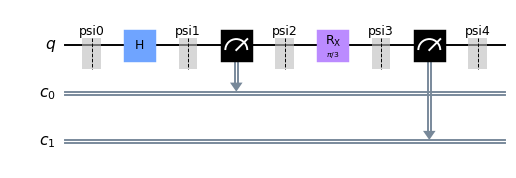

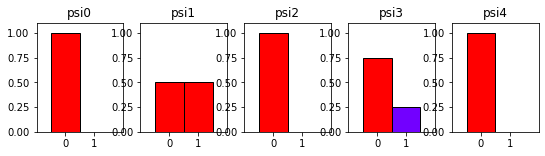

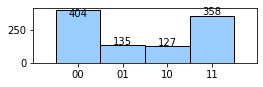

In [79]:
#======== Examine results
fig,ax = plt.subplots(figsize=(9,4))
cir.draw('mpl',ax=ax,cregbundle=False)
smax = len(stateVectors)
fig,axs = plt.subplots(1,smax,figsize=(9,2))
for s in range(smax):
  ax=axs[s]; plotStateVector(stateVectors[s], ax); ax.set_title (stateNames[s]); ax.set_ylim(0,1.1)
fig,ax = plt.subplots(figsize=(4,1))
plotHistogram (cts,ax)